In [2]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import metrics
from sklearn.datasets import load_iris
from sklearn.discriminant_analysis import (
    LinearDiscriminantAnalysis,
    QuadraticDiscriminantAnalysis,
)
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
import pickle
from pathlib import Path

Matplotlib is building the font cache; this may take a moment.


In [3]:
MODELS_DIR = Path("models/")
SKLEARN_MODEL_PATH = MODELS_DIR.joinpath("sklearn/iris_model.pk")
TF_MODEL_PATH = MODELS_DIR.joinpath("tf/iris_model")

SKLEARN_MODEL_PATH.parent.mkdir(exist_ok=True, parents=True)
TF_MODEL_PATH.parent.mkdir(exist_ok=True, parents=True)

# Train model using sklearn

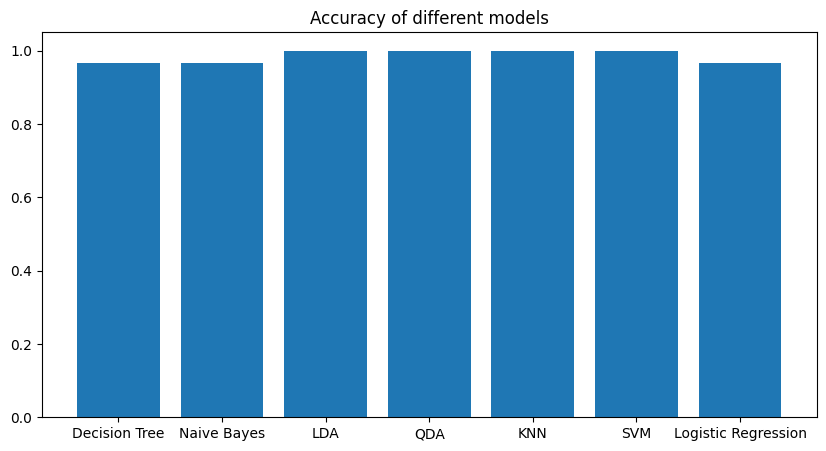

The best model is LDA with an accuracy of 1.00


In [4]:
# Load the iris dataset
iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df["target"] = iris.target

X = df[
    [
        "sepal length (cm)",
        "sepal width (cm)",
        "petal length (cm)",
        "petal width (cm)",
    ]
]
y = df["target"]  # target is the species of the flower

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Create a list of classifiers
models = {
    "Decision Tree": DecisionTreeClassifier(max_depth=3, random_state=1),
    "Naive Bayes": GaussianNB(),
    "LDA": LinearDiscriminantAnalysis(),
    "QDA": QuadraticDiscriminantAnalysis(),
    "KNN": KNeighborsClassifier(),
    "SVM": SVC(kernel="linear"),
    "Logistic Regression": LogisticRegression(),
}

# Train the models
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    results[name] = metrics.accuracy_score(y_test, y_pred)

# Plot results
plt.figure(figsize=(10, 5))
plt.bar(results.keys(), results.values())
plt.title("Accuracy of different models")
plt.show()

# Print results
best_model = max(results, key=results.get)
print(f"The best model is {best_model} with an accuracy of {results[best_model]:.2f}")

# save the model to disk
pickle.dump(
    models[best_model], open(SKLEARN_MODEL_PATH, "wb")
)  # export the model to a file so we can use it later


# Train model using Tensorflow

In [21]:
import tensorflow as tf
import os
import matplotlib.pyplot as plt
import tensorflow_datasets as tfds
from pathlib import Path
import numpy as np

In [7]:
tf.config.list_physical_devices('GPU')

2023-08-19 11:53:38.619637: E tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:268] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected


[]

In [8]:
train_dataset, metadata = tfds.load("iris", with_info=True, as_supervised=True, split="train", batch_size=32)
num_examples = metadata.splits["train"].num_examples
num_classes = metadata.features["label"].num_classes
labels = metadata.features["label"].names

2023-08-19 11:53:48.078486: W tensorflow/tsl/platform/cloud/google_auth_provider.cc:184] All attempts to get a Google authentication bearer token failed, returning an empty token. Retrieving token from files failed with "NOT_FOUND: Could not locate the credentials file.". Retrieving token from GCE failed with "FAILED_PRECONDITION: Error executing an HTTP request: libcurl code 6 meaning 'Couldn't resolve host name', error details: Could not resolve host: metadata.google.internal".


Dl Size...: 0 MiB [00:01, ? MiB/s]1/1 [00:01<00:00,  1.03s/ url]
Dl Completed...: 100%|██████████| 1/1 [00:01<00:00,  1.05s/ url]


Dataset iris downloaded and prepared to /home/alejandro/tensorflow_datasets/iris/2.0.0. Subsequent calls will reuse this data.


2023-08-19 11:54:03.429071: W tensorflow/core/kernels/data/cache_dataset_ops.cc:854] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.


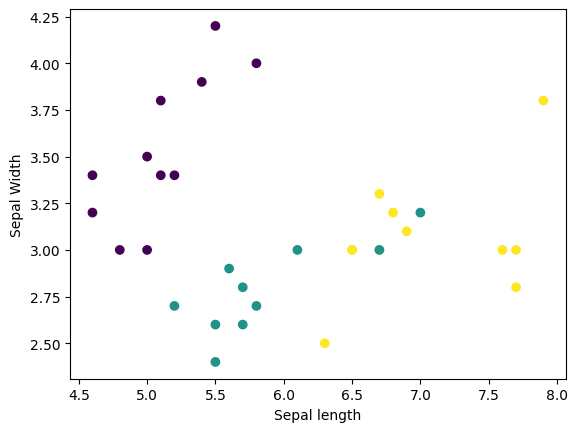

In [9]:
features, labels = next(iter(train_dataset))
sepal_length = features[:,0]
sepal_width = features[:,1]

plt.scatter(sepal_length,
            sepal_width,
            c=labels,
            cmap='viridis')
plt.xlabel("Sepal length")
plt.ylabel("Sepal Width")
plt.show()

In [15]:
model = tf.keras.Sequential([
  tf.keras.layers.Dense(10, activation=tf.nn.relu, input_shape=(4,), name= "input"), 
  tf.keras.layers.Dense(5, activation=tf.nn.relu),
  tf.keras.layers.BatchNormalization(),
  tf.keras.layers.Dense(3, activation=tf.nn.softmax, name="output")
])

Epoch 1/60
5/5 [==============================] - 2s 5ms/step - loss: 1.3594 - accuracy: 0.2267
Epoch 2/60
5/5 [==============================] - 0s 5ms/step - loss: 1.3262 - accuracy: 0.2267
Epoch 3/60
5/5 [==============================] - 0s 5ms/step - loss: 1.2967 - accuracy: 0.2467
Epoch 4/60
5/5 [==============================] - 0s 6ms/step - loss: 1.2686 - accuracy: 0.2533
Epoch 5/60
5/5 [==============================] - 0s 5ms/step - loss: 1.2421 - accuracy: 0.2733
Epoch 6/60
5/5 [==============================] - 0s 5ms/step - loss: 1.2171 - accuracy: 0.3067
Epoch 7/60
5/5 [==============================] - 0s 5ms/step - loss: 1.1910 - accuracy: 0.3467
Epoch 8/60
5/5 [==============================] - 0s 5ms/step - loss: 1.1554 - accuracy: 0.3800
Epoch 9/60
5/5 [==============================] - 0s 5ms/step - loss: 1.0788 - accuracy: 0.4467
Epoch 10/60
5/5 [==============================] - 0s 7ms/step - loss: 1.0025 - accuracy: 0.5133
Epoch 11/60
5/5 [======================

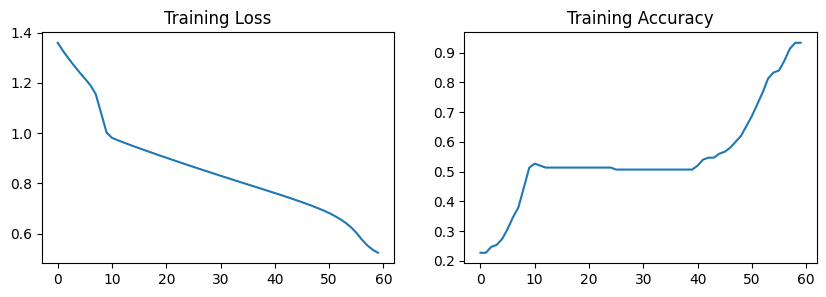

In [16]:
loss_fun = tf.keras.losses.SparseCategoricalCrossentropy()
opt_fun = tf.keras.optimizers.Adam()
model.compile(optimizer=opt_fun, loss=loss_fun, metrics=['accuracy'] )
history = model.fit(train_dataset, batch_size=12, epochs=60)

acc = history.history['accuracy']
loss = history.history['loss']
plt.figure(figsize=(10, 3))
ax = plt.subplot(1, 2, 1)
ax.set_title("Training Loss")
ax.plot(loss)
ax = plt.subplot(1, 2, 2)
ax.set_title("Training Accuracy")
ax.plot(acc)
plt.show()

In [17]:
predictions = model.predict([[0.5, 0.4, 0.8, 0.4]])

1/1 [==============================] - 0s 271ms/step


In [19]:
print(predictions)

[[0.85783094 0.03802439 0.10414469]]


In [18]:
model.save(TF_MODEL_PATH, save_format="tf")

INFO:tensorflow:Assets written to: models/tf/iris_model/assets


INFO:tensorflow:Assets written to: models/tf/iris_model/assets


In [ ]:
import shutil
from pathlib import Path
from google.colab import files
import sys

def folder_to_zip(folder_path):
    folder_path = Path(folder_path)
    if not folder_path.exists():
        return
    shutil.make_archive(folder_path.name, 'zip', folder_path)
    return folder_path.with_suffix(".zip")

def zip_and_download_folder_content(model_folder):
    zip_file = folder_to_zip(model_folder)
    files.download(zip_file)



In [ ]:
zip_and_download_folder_content(MODELS_DIR)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>